Warning message:
"Continuous limits supplied to discrete scale.
Did you mean `limits = factor(...)` or `scale_*_continuous()`?"


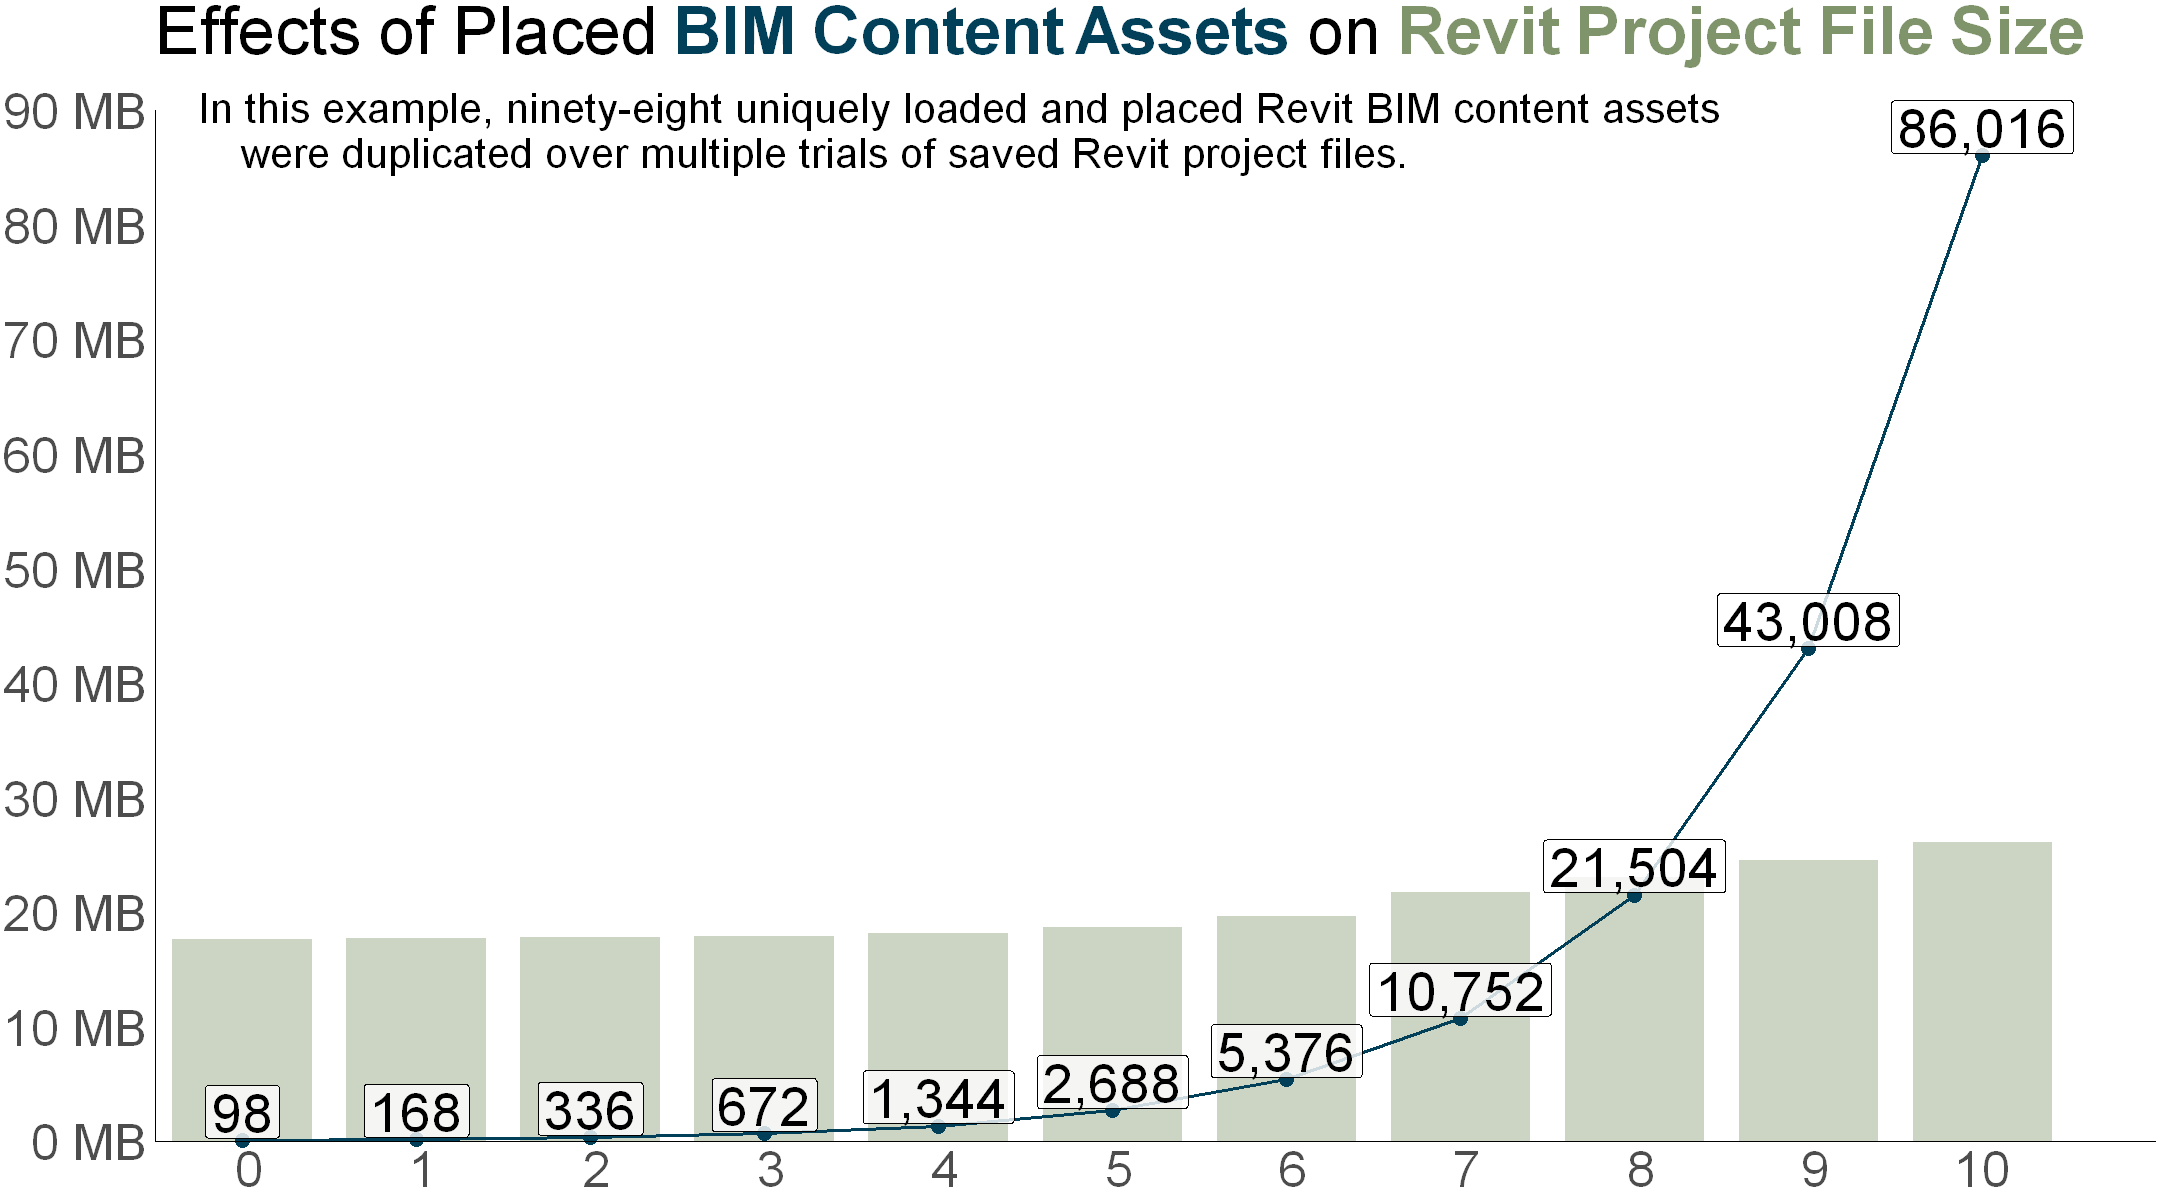

In [2]:
####################import libraries
library(tidyverse)
library(ggtext)

####################this is the setup for the chart. You need the x, y, and another y so the chart understands what to plot for the numbers.
####################Data Source = ENGworks Global @ https://www.engworksglobal.com

x <- c(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
y1 <- c(98, 168, 336, 672, 1344, 2688, 5376, 10752, 21504, 43008, 86016)
y2 <- c(17660, 17700, 17760, 17880, 18140, 18648, 19664, 21688, 23040, 24560, 26080)

####################logistics of putting two plots together. The first part is the line where you can specify color, what markers look like, etc. The second part is the bar on its own where you can also customize color, etc. See documentation for full list of customizations.

p <- ggplot()+
    geom_bar(aes(x = x, y = y2), stat = "identity", fill = "#7F946B", alpha = 0.4, width = 0.8)+
    geom_line(aes(x = x, y = y1), size = 0.9, color = "#024059")+
    geom_point(aes(x = x, y = y1), size = 4, color = "#024059")+
    geom_label(aes(x = x, y = y1), 
              label = scales::comma(y1),
              #label = y1, 
              nudge_x = 0, 
              nudge_y = 2500, 
              size = 11.5,
              fill = "white",
              alpha = 0.8)+
    labs(x = NULL, y = NULL)+
    coord_cartesian(ylim = c(0,90000), xlim = c(-0.5,11), expand = FALSE, clip = "off")+
    theme_classic()
    
####################Make plots wider 
options(repr.plot.width=18, repr.plot.height=10)

####################customize the x and y tick labels
p + theme(plot.margin = margin(2,2,2,2),
          axis.text.x = element_text(size = 30),
          axis.text.y = element_text(size = 30),
          axis.ticks = element_blank())+
    scale_x_discrete(limits = c(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10), expand = c(0.008,0))+
    scale_y_continuous(breaks = c(0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000),
                       labels = c("0 MB", "10 MB","20 MB", "30 MB", "40 MB", "50 MB", "60 MB", "70 MB", "80 MB", "90 MB"),
                       limits = c(0, 90000), expand = c(0,0)
                       )+
    labs(x = NULL,
         y = NULL,
         title = "Effects of Placed <span style = 'color: #024059; font-weight: bold;'>**BIM Content Assets**</span> on <span style = 'color: #7F946B; font-weight: bold;'>**Revit Project File Size**</span>",
         subtitle = "In this example, ninety-eight uniquely loaded and placed Revit BIM content assets\n were duplicated over multiple trials of saved Revit project files.")+
    theme(plot.title = element_textbox(size = 40, margin = margin(t = 0, b = -30)),
          plot.subtitle = element_text(size = 25, vjust = -8, hjust = 0.09))
    